<a href="https://colab.research.google.com/github/199cpunith/CPR-MACHINE-LEARNING-TABS/blob/main/KNN_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Cost_of_Living_Index_by_Country_2024.csv')
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [ ]:
df['Groceries Index'].value_counts()

,count
Groceries Index,
25.4,3
36.8,3
33.9,2
64.1,2
43.4,2
...,...
46.9,1
56.1,1
55.3,1


array([[<Axes: title={'center': 'Rent Index'}>]], dtype=object)

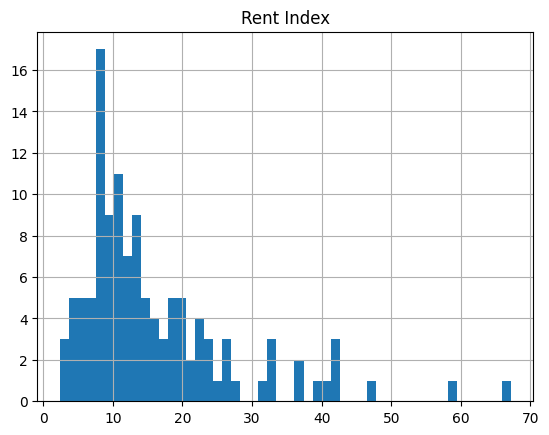

In [ ]:
df.hist(column='Rent Index', bins=50)

In [ ]:
df.columns

Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [ ]:
X = df[['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index']] .values  #.astype(float)
X[0:5]

array([[1, 'Switzerland', 101.1, 46.5, 74.9, 109.1, 97.0, 158.7],
       [2, 'Bahamas', 85.0, 36.7, 61.8, 81.6, 83.3, 54.6],
       [3, 'Iceland', 83.0, 39.2, 62.0, 88.4, 86.8, 120.3],
       [4, 'Singapore', 76.7, 67.2, 72.1, 74.6, 50.4, 111.1],
       [5, 'Barbados', 76.6, 19.0, 48.9, 80.8, 69.4, 43.5]], dtype=object)

In [ ]:
y = df['Groceries Index'].values
y[0:5]

array([109.1,  81.6,  88.4,  74.6,  80.8])

In [ ]:
import pandas as pd
from sklearn import preprocessing

# Assuming 'df' is your DataFrame
X = df[['Rank', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index']].values.astype(float)  # Exclude 'Country' column

# Scale the numerical features
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.717795  ,  3.57848792,  2.67902129,  3.37215751,  3.81943089,
         3.32896488,  2.37546504],
       [-1.68916509,  2.57728838,  1.81672563,  2.38039432,  2.20030633,
         2.5754934 , -0.26631517],
       [-1.66053517,  2.45291576,  2.03669901,  2.39553574,  2.60067168,
         2.76798612,  1.40097551],
       [-1.63190525,  2.06114203,  4.5004009 ,  3.16017759,  1.78816554,
         0.76606191,  1.16750406],
       [-1.60327534,  2.0549234 ,  0.25931408,  1.40377256,  2.15320453,
         1.81102235, -0.54800355]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (96, 7) (96,)
Test set: (25, 7) (25,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # Use a regressor for continuous targets

k = 10
#Train Model and Predict
neigh = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train) # Changed to KNeighborsRegressor
neigh

KNeighborsRegressor(n_neighbors=10)

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([64.13, 74.  , 54.18, 60.  , 63.56])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsRegressor

k = 10
#Train Model and Predict
neigh = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
print(neigh)

yhat = neigh.predict(X_test)
print(yhat[0:5])

from sklearn import metrics
# Use metrics appropriate for regression problems
print("Train set R-squared: ", metrics.r2_score(y_train, neigh.predict(X_train)))
print("Test set R-squared: ", metrics.r2_score(y_test, yhat))

Train set: (96, 7) (96,)
Test set: (25, 7) (25,)
KNeighborsRegressor(n_neighbors=10)
[64.13 74.   54.18 60.   63.56]
Train set R-squared:  0.8708345282657479
Test set R-squared:  0.928018952960722


In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    # Use KNeighborsRegressor for continuous targets
    neigh = KNeighborsRegressor(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    # Use a regression metric like mean squared error
    mean_acc[n-1] = metrics.mean_squared_error(y_test, yhat)

mean_acc

array([20.7456    , 18.5658    , 18.12631111, 25.54395   , 21.78616   ,
       20.01327778, 23.38545306, 25.4208875 , 23.98673086])

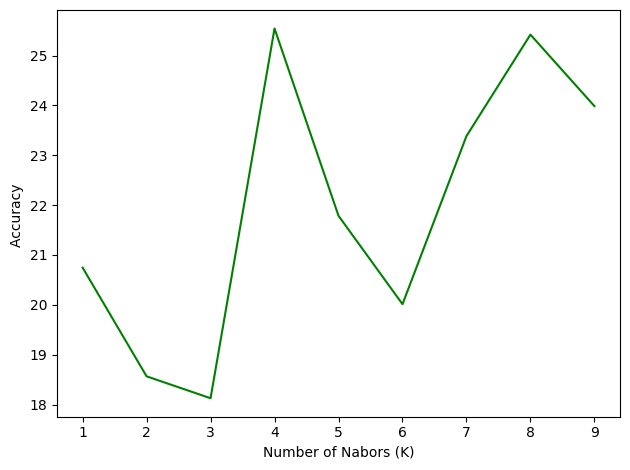

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 25.54395 with k= 4
